# Tutorial on GPFlow Regression

From here: http://gpflow.readthedocs.io/en/latest/notebooks/regression.html

In [191]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot

N = 12
x = np.random.rand(N,1)
X = np.array([[i,i] for i in x]).reshape(12,2)
print(X)

print("random gradient = ",g)
Y = np.ones(12).reshape(12,1)

# # plt.plot(X, Y, 'kx', mew=2)

[[0.15847937 0.15847937]
 [0.59243327 0.59243327]
 [0.02886144 0.02886144]
 [0.37330523 0.37330523]
 [0.42497403 0.42497403]
 [0.07809415 0.07809415]
 [0.53634711 0.53634711]
 [0.0475208  0.0475208 ]
 [0.13048066 0.13048066]
 [0.87650154 0.87650154]
 [0.68065063 0.68065063]
 [0.24657774 0.24657774]]
random gradient =  0.5


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [171]:
from __future__ import print_function, absolute_import

import gpflow
import numpy as np
import tensorflow as tf

from gpflow.models import GPR
from gpflow.decors import autoflow

float_type = gpflow.settings.dtypes.float_type

class GPR_with_grad(GPR):
    def __init__(self, X, Y, kern):
        GPR.__init__(self, X, Y, kern)
        print("m = GPR with posterior gradients")

    @autoflow((float_type, [None, None]))
    def compute_posterior_grad_at(self, Xnew):
        """
        Compute the gradient of the posterior mean function at a specific valuem, Xnew.
        """
        pred_mean, pred_var = self._build_predict(Xnew)
        return tf.gradients(pred_mean, Xnew)

In [145]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'C0', lw=2)
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)
# plot(m)


In [198]:
x_test = np.array([[0.5,0.5],[0.5,0.5]]).reshape(2,2)
x_test

array([[0.5, 0.5],
       [0.5, 0.5]])

In [199]:
k = gpflow.kernels.RBF(2)
m = GPR_with_grad(X, Y, kern=k)
m.likelihood.variance = 0.01
print("\ngradient of posterior =", m.compute_posterior_grad_at(x_test))

gpflow.train.ScipyOptimizer().minimize(m)
print("\ngradient of posterior =", m.compute_posterior_grad_at(x_test))

# plot(m)
print(m)

m = GPR with posterior gradients

gradient of posterior = [array([[-0.00573061, -0.00573061],
       [-0.00573061, -0.00573061]])]
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: -63.215552
  Number of iterations: 42
  Number of functions evaluations: 51

gradient of posterior = [array([[-7.16359652e-12, -7.16359652e-12],
       [-7.16359652e-12, -7.16359652e-12]])]
                                       class prior transform  trainable shape  \
GPR_with_grad/likelihood/variance  Parameter  None       +ve       True    ()   
GPR_with_grad/kern/lengthscales    Parameter  None       +ve       True    ()   
GPR_with_grad/kern/variance        Parameter  None       +ve       True    ()   

                                   fixed_shape               value  
GPR_with_grad/likelihood/variance         True               1e-06  
GPR_with_grad/kern/lengthscales           True  145733.69683533406  
GPR_with_g

/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/misc.py:30: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(keys, axis=1)


In [186]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
meanf = gpflow.mean_functions.Linear(1.0, 0.0)
m = gpflow.models.GPR(X, Y, k, meanf)
m.likelihood.variance = 0.01

gpflow.train.ScipyOptimizer().minimize(m)
plot(m)
print(m)

InvalidArgumentError: Matrix size-incompatible: In[0]: [12,2], In[1]: [1,1]
	 [[Node: 208/GPR/likelihood_1/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](208/GPR/X/dataholder/read, 201/Linear/A/unconstrained/read)]]

Caused by op '208/GPR/likelihood_1/MatMul_1', defined at:
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-186-298650ca83d7>", line 3, in <module>
    m = gpflow.models.GPR(X, Y, k, meanf)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/core/compilable.py", line 90, in __init__
    self.build()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/core/node.py", line 130, in build
    self._build()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/models/model.py", line 81, in _build
    likelihood = self._build_likelihood()
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/decors.py", line 42, in runnable
    return method(*args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/decors.py", line 60, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/models/gpr.py", line 65, in _build_likelihood
    m = self.mean_function(self.X)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/decors.py", line 60, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/mean_functions.py", line 67, in __call__
    return tf.matmul(X, self.A) + self.b
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2437, in _mat_mul
    name=name)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Matrix size-incompatible: In[0]: [12,2], In[1]: [1,1]
	 [[Node: 208/GPR/likelihood_1/MatMul_1 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](208/GPR/X/dataholder/read, 201/Linear/A/unconstrained/read)]]


In [16]:
m.clear()

m.kern.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern.variance.prior = gpflow.priors.Gamma(1., 1.)
m.likelihood.variance.prior = gpflow.priors.Gamma(1., 1.)
m.mean_function.A.prior = gpflow.priors.Gaussian(0., 10.)
m.mean_function.b.prior = gpflow.priors.Gaussian(0., 10.)
m.compile()
print(m)


                             class          prior transform  trainable  \
GPR/kern/variance        Parameter  Ga([1.],[1.])       +ve       True   
GPR/kern/lengthscales    Parameter  Ga([1.],[1.])       +ve       True   
GPR/mean_function/A      Parameter  N([0.],[10.])    (none)       True   
GPR/mean_function/b      Parameter  N([0.],[10.])    (none)       True   
GPR/likelihood/variance  Parameter  Ga([1.],[1.])       +ve       True   

                          shape  fixed_shape                    value  
GPR/kern/variance            ()         True       0.5695211218805476  
GPR/kern/lengthscales        ()         True      0.09824173622595592  
GPR/mean_function/A      (1, 1)         True  [[-1.2314683873292254]]  
GPR/mean_function/b          ()         True        3.597129407793744  
GPR/likelihood/variance      ()         True   1.0000459390303564e-06  


/home/scpd/Software/anaconda3/envs/GPflow3.5/lib/python3.5/site-packages/gpflow-1.1.0-py3.5.egg/gpflow/misc.py:30: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(keys, axis=1)


In [18]:
sampler = gpflow.train.HMC()
samples = sampler.sample(m, num_samples=500, epsilon=0.05, lmin=10, lmax=20, logprobs=False)

Text(0,0.5,'parameter value')

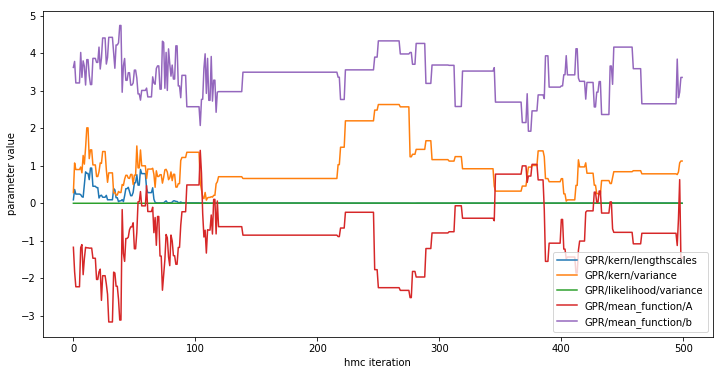

In [19]:
for i, col in samples.iteritems():
    plt.plot(col, label=col.name)
plt.legend(loc=0)
plt.xlabel('hmc iteration')
plt.ylabel('parameter value')